In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../data/all_stocks_5yr.csv', parse_dates=True)
data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [3]:
sbux = data[data['Name'] == 'SBUX'].copy()
sbux.head()

,date,open,high,low,close,volume,Name
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX


<AxesSubplot:>

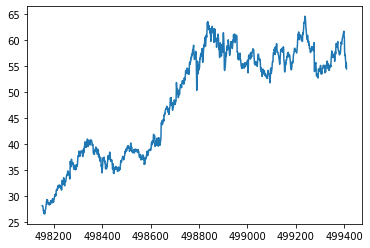

In [4]:
sbux['close'].plot()

### Calculating the return of SBUX

- Will need the current price and previous close price to calculate

In [5]:
# Shifting the data by one row on a new 'prev_close' column to begin calculating the return

sbux['prev_close'] = sbux['close'].shift(1)

In [6]:
sbux.head()

,date,open,high,low,close,volume,Name,prev_close
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915


In [7]:
# Calculating the return for each day in a new column

sbux['return'] = sbux['close'] / sbux['prev_close'] -1

In [8]:
sbux.head()

,date,open,high,low,close,volume,Name,prev_close,return
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015


In [9]:
# Another way to calculate the percent return without a 'previous close' column

sbux['return 2'] = sbux['close'].pct_change(1)

In [10]:
sbux.head()

,date,open,high,low,close,volume,Name,prev_close,return,return 2
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080,-0.004080
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138,0.002138
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643,-0.007643
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015,-0.005015


<AxesSubplot:>

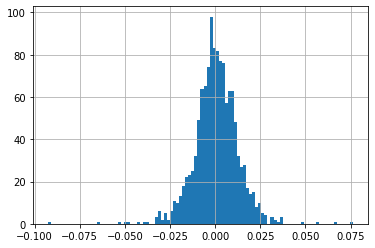

In [11]:
# Using a histogram to visualize the distribution of returns

sbux['return'].hist(bins=100)

In [12]:
# Calculating statistics on the returns (mean and std)

sbux['return'].mean(), sbux['return'].std()

(0.0006002332205830914, 0.012360934026133879)

In [13]:
# Calculating the log return as well (in a new column)

sbux['log_return'] = np.log(sbux['return'] + 1)

In [14]:
sbux.head()

,date,open,high,low,close,volume,Name,prev_close,return,return 2,log_return
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN,NaN,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080,-0.004080,-0.004089
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138,0.002138,0.002135
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643,-0.007643,-0.007672
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015,-0.005015,-0.005028


<AxesSubplot:title={'center':'Nearly the same distribution as non-log returns'}, ylabel='Frequency'>

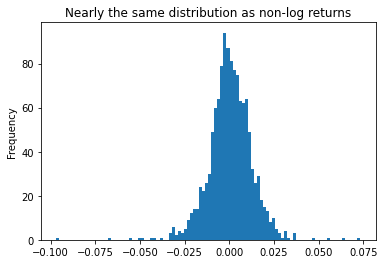

In [15]:
sbux['log_return'].plot(kind='hist', bins=100, title='Nearly the same distribution as non-log returns')

In [16]:
# Mean and STD of log returns

sbux['log_return'].mean(), sbux['log_return'].std()

(0.0005235902748108682, 0.012381234216101258)

---

# QQ Plots - Quantile-Quantile Plot

*When you see a bell curve (see notbook 03), you should automatically think of the Normal/Gaussian distribution.*

### What is a Quantil?
- Roughly, it is like the inverse of the CDF (Cumulative Distribution Function)

## QQ-Plot 
- A plot of sample quantiles vs. theoretical quantiles (from an assumed distribution).
- This type of plot is also known as a "Normal Probability Plot"
- Generally, if your actual data fits in a straight line, compared the the theoretical normal distribution, your data is *Normal*

In [17]:
from scipy.stats import norm

In [18]:
x_list = np.linspace(sbux['return'].min(), sbux['return'].max(), 100)

In [19]:
y_list = norm.pdf(x_list, loc=sbux['return'].mean(), scale=sbux['return'].std())

<AxesSubplot:title={'center':'Not a very good comparison as much of the data is outside the normal standard'}>

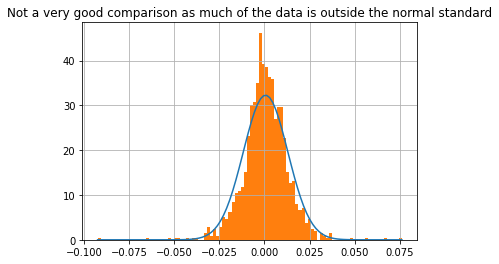

In [20]:
plt.plot(x_list, y_list)
plt.title("Not a very good comparison as much of the data is outside the normal standard")
sbux['return'].hist(bins=100, density=True) # desnity=True means it will be normalized

### Generating a QQ-Plot to verify the above comparison plot is not a great fit (to standard normal).

In [21]:
# First using Scipi to generate the plot

from scipy.stats import probplot

Text(0.5, 1.0, 'The tails at the start and end are way to heavy for our standard normal distribution.')

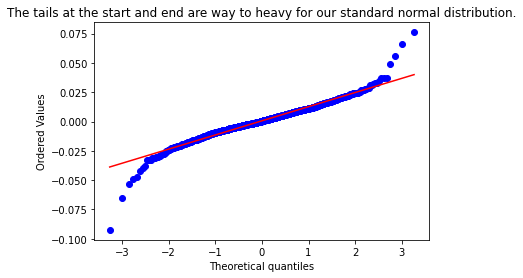

In [22]:
probplot(sbux['return'].dropna(), dist='norm', fit=True, plot=plt)
plt.title("The tails at the start and end are way to heavy for our standard normal distribution.")

In [23]:
# Using Statsmodels (instead of scipy) to generate the same plot

import statsmodels.api as sm

Text(0.5, 1.0, 'Same plot as above.')

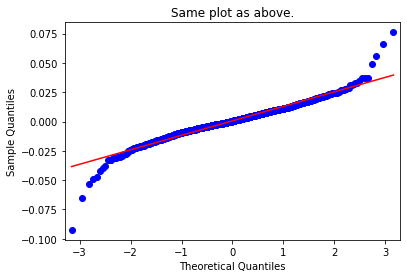

In [24]:
sm.qqplot(sbux['return'].dropna(), line='s')
plt.title("Same plot as above.")

### Testing to see if anything changes by using the log returns instead of the *returns*

In [25]:
x_list = np.linspace(sbux['log_return'].min(), sbux['log_return'].max(), 100)

In [26]:
y_list = norm.pdf(x_list, loc=sbux['log_return'].mean(), scale=sbux['log_return'].std())

Text(0.5, 1.0, 'Basically the same results on these log returns as\nabove with non-log returns.')

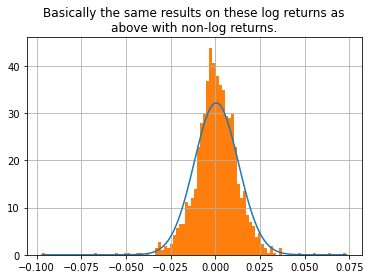

In [27]:
plt.plot(x_list, y_list)
sbux['log_return'].hist(bins=100, density=True)
plt.title("Basically the same results on these log returns as\nabove with non-log returns.")

### QQ-plot of the log-results

Text(0.5, 1.0, 'Again, basically the same result as non-log plot.')

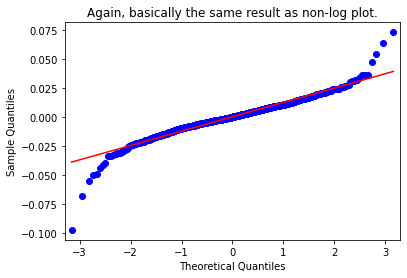

In [28]:

sm.qqplot(sbux['log_return'].dropna(), line='s')
plt.title("Again, basically the same result as non-log plot.")

---

# The t-Distribution

When the *Normal* is not a good fit, what to do?
- Try a *t-Distribution*

Usually a t-Distribution is used in hypothesis testing. It can support the heavier tails from above.

In it's usual form, there is only one parameter to deal with. It is also always centered over 0.

Finding the parameter is more like a machine learning function than the above standard deviation examples.
- Need to call `df, loc, scale = t.fit(data)` to *fit the model*

NOTE: `pdf(X, df, loc, scale) == (1 / scale) * pdf((X - loc) / scale, df)`

In [29]:
from scipy.stats import t

In [30]:
# 100 evenly spaced points between min and max to represent the X-axis of the plot.

x_list = np.linspace(sbux['return'].min(), sbux['return'].max(), 100)

In [32]:
# Get the parameters of the best fitting distribution to the data.
# Returns degrees of freedom, location, scale

params = t.fit(sbux['return'].dropna())
params

(4.78753221828017, 0.0007108616716254146, 0.009341981642040986)

In [33]:
df, loc, scale = params

In [34]:
# Get the PDF of the t-Distribution using the parameters (x-values, parameters)

y_list = t.pdf(x_list, df, loc, scale)

Text(0.5, 1.0, 'This t-Distribution is a much better fit to our data than the QQ-plot from above.\nIt almost captures the entire peak of the data, and there is no gap in the tails of the data.')

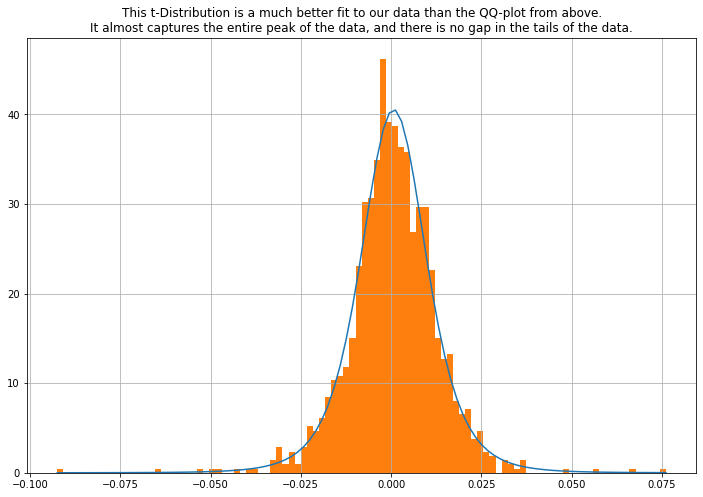

In [41]:
plt.plot(x_list, y_list)
sbux['return'].hist(bins=100, density=True, figsize=(12,8))
plt.title("This t-Distribution is a much better fit to our data than the QQ-plot from above.\nIt almost captures the entire peak of the data, and there is no gap in the tails of the data.")

In [42]:
# Attempting to get the qq plot with the t-distribution via statsmodels. - Didn't work since no degress of freedom was passed.

sm.qqplot(sbux['return'].dropna(), dist=t, line='s')

TypeError: %s requires more parameters to compute ppf

In [43]:
# Attempting the qq-plot again using scipy - Again, no degrees of freedom passed to params. 

probplot(sbux['return'].dropna(), dist='t', fit=True, plot=plt)

TypeError: _parse_args() missing 1 required positional argument: 'df'

In [44]:
# Creating a custom class that stores the degrees of freedom as a variable, fits the data and returns the ppf.

class my_t:
    def __init__(self, df):
        self.df = df
    
    def fit(self, x):
        return t.fit(x)
    
    def ppf(self, x, loc=0, scale=1):
        return t.ppf(x, self.df, loc, scale)

Text(0.5, 1.0, 'QQ-Plot using a custom class and a t-Distribution as data.\n\nNotice the tails of this data are much more normal compared to the non-t-distributed data.')

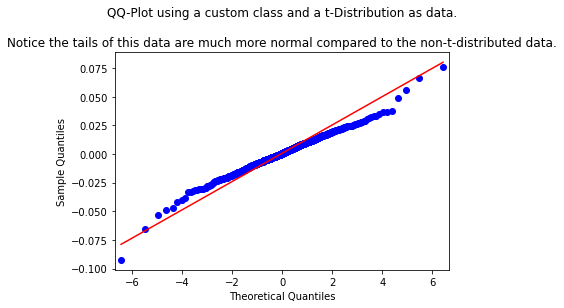

In [59]:
# Using statsmodels with the custom class to get the QQ-Plot

sm.qqplot(sbux['return'].dropna(), dist=my_t(df), line='s')
plt.title("QQ-Plot using a custom class and a t-Distribution as data.\n\nNotice the tails of this data are much more normal compared to the non-t-distributed data.")

In [60]:
# Using the t-Distribution on the log returns

x_list = np.linspace(sbux['log_return'].min(), sbux['log_return'].max(), 100)

In [61]:
params = t.fit(sbux['log_return'].dropna())
df, loc, scale = params
y_list = t.pdf(x_list, df, loc, scale)

Text(0.5, 1.0, 't-Distribution of the log_returns')

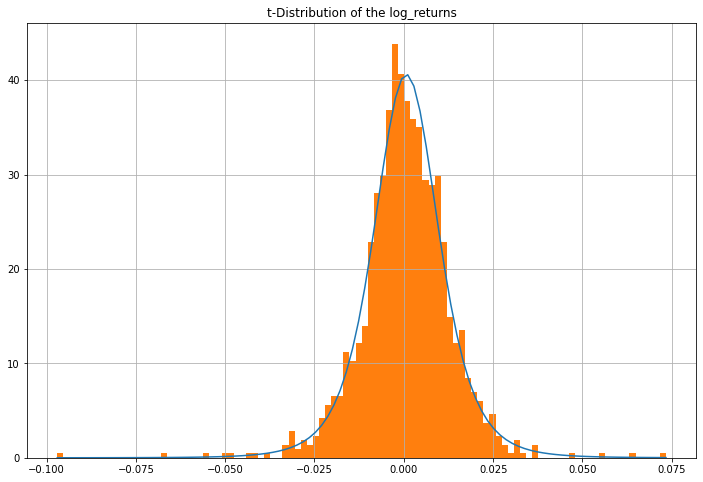

In [65]:
plt.plot(x_list, y_list)
sbux['log_return'].hist(bins=100, density=True, figsize=(12,8))
plt.title("t-Distribution of the log_returns")

Text(0.5, 1.0, 'QQ-plot of the t-Distributed log_returns')

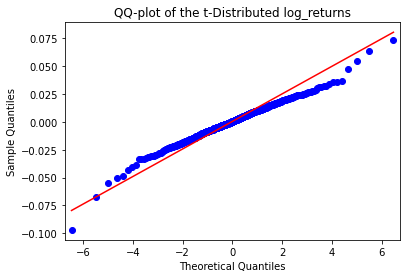

In [68]:
sm.qqplot(sbux['log_return'].dropna(), dist=my_t(df), line='s')
plt.title("QQ-plot of the t-Distributed log_returns")

---

# Skewness & Kurtosis

So far, the above examples show the 1st moment (mean) and the 2nd moment (variance).

The 3rd moment is **Skewness** and the 4th is **Kurtosis**.

## Skewness

A normal distribution (above) is centered on 0 with the tails on both sides of max basically identical.

A **Negative Skew** is when the plot shows a longer left-tail than the right - indicating the potential for a negative return is higher.

A **Positive Skew** show a longer right-side tail compared to the left side - indicating the potential for less loss and greater potential for positive returns.

## Kurtosis

Kurtosis is a way to measure how heavy the tails are (compared to standard normal).

A **Normal** model shows a constant curtosis of 3.

The useful number Kurtosis gives you is called **Excess Kurtosis** which is equal to `kurtosis - 3` (3 being standard).

Excess kurtosis greater than 0 == heavier-tailed model than Normal.

A high kurtosis means more potential for extreme returns (risk - dangerouse for investors).

## Calculating Skewness and Kurtosis with Python (Pandas)

```Python
df = pd.DataFrame(data)

# Skewness
df['column'].skew() # returns skewness
    
# Kurtosis
df['column'].kurtosis() # returns kurtosis 
```

In [71]:
# Examples of skewness
sbux['return'].skew()

-0.2680784195824153

Since the Skewness of SBUX is negative, we can say that you are more likely to get extreme negative values if investing in this ETF

In [70]:
# Example of Kurtosis

sbux['return'].kurtosis()

5.593158903424731

Since the Kurtosis is greater than 3, we can imply that, in general, we can expect more extreme values with this ETF (extreme positive and negative returns)

---

# Confidence Intervals

*Whenever you estimate some data, you should ask "how confident am I in my estimation"?*

Generally speaking, the more data you collect, the more confident you can be about your estimation.
- ie: Only seeing a positive return in a backtraded portfolio, compared to the mean, does not imply you will make money.  Having a confidence interval will solidify your hypothesized tests.

To start, the **Sample Mean** is a random variable (not accurate as its a sum divided by amount).
- The sum of random variables is also random.

However, The expected value of the sample mean is the mean.
- As you collect more data, the variance decreases (with 1/N)

**NOTE:** part of the calculation to get confidence intervals involves knowing the sigma. This is not possible for most applications in finance.  As a result, I will be estimating sigma with sample standard deviation *s*
- This will be t-Distributed which could be a problem - However, as N approces infinity, *s* approches the standard normal model.

<br/>

**Another way of finding the confidence interval could be via Bootstrapping.**
- Common way to estimate intervals in finance and time series forecasting.
- The idea is to repeatedly draw samples form our own set of samples.

<br/>

## The big picture:
### Model stock returns 

Previously (above) we have been able to see how returns can be distributed.  Now we are attempting to quantify this distribution.

# Calculating the Confidence Intervals

In [73]:
# Convert SBUX returns into it's own array

values = sbux['return'].dropna().to_numpy()

In [74]:
# Get mean and STD of "values"

m = values.mean()
s = values.std(ddof=1)

In [76]:
# Calculate the lower and upper limit of the confidence interval (via formula from slides).

low = m - 1.96 * s / np.sqrt(len(values))
high = m + 1.96 * s / np.sqrt(len(values))

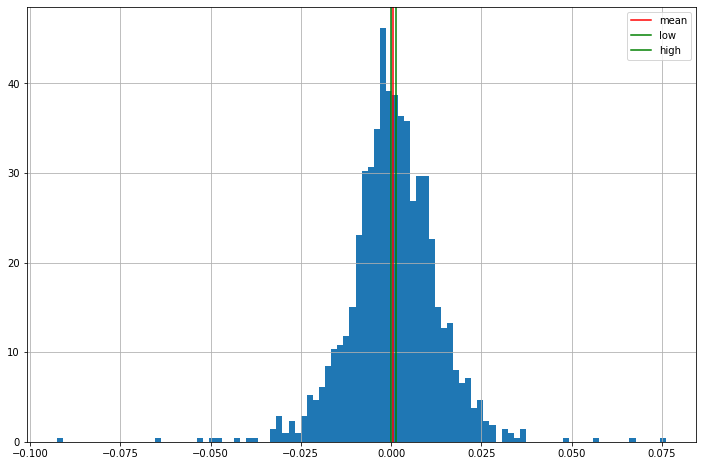

In [77]:
# Plot the confidence interval over a histogram of the returns

sbux['return'].hist(bins=100, density=True, figsize=(12,8))
plt.axvline(m, label='mean', color='red')
plt.axvline(low, label='low', color='green')
plt.axvline(high, label='high', color='green')
plt.legend()

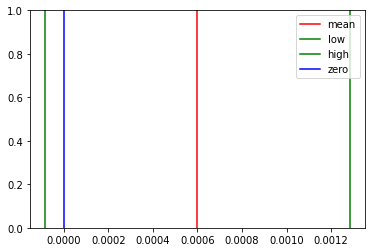

In [80]:
# plot only the verticle lines (to see the data better)

plt.axvline(m, label='mean', color='red')
plt.axvline(low, label='low', color='green')
plt.axvline(high, label='high', color='green')
plt.axvline(0, label='zero', color='blue')
plt.legend()

---

# Statistical Testing

1. Check wheather data is normally distributed or not
    - Previously, using a graphical method
2. Confidence intervals

<br/>

## The API Approach

*The "lazy/beginner" approach*

**Example of the API Approach to Statistical Testing.**
- Drug company want to test a drug for blood pressure
- Control group vs. treatment group
- Collect data (ie: blood pressure readings) from the participants
- Form a *null* hypothesis
    - Drug has no effect (H<sub>0</sub>)
- Form alternative hypothesis
    - Drug does have an effect (H<sub>1</sub> or H<sub>a</sub>)
    - Perform a statistical test on this alternative hypothesis 
        - The output is the **P-Value**

<br/>

## P-Value/ Two-Sided Testing

- The p-value is a probability
    - If p < threshold, **reject** the null hypothesis.
        - Usually the threshold is 5% or 1%
- More specifically, the **p-value** is the probability of seeing a test statistic (Z) as extreme or more extreme assuming H<sub>0</sub> is true.
- This is called a 2-sided test because we can reject the null hypothesis (H<sub>0</sub>) if μ > μ<sub>0</sub> or μ < μ<sub>0</sub>

**Example**
- if Z = -2
- p-value = P(Z <= -2) + P(Z >= 2)

<br/>

### NOTE on statistics in general

- Machine learning uses more concrete terms than statistics.
    - ie: *"I classify this picure as a dog."*
- Statistics does NOT say they accept a hypothesis (too concrete a term).
- Instead, if an alternative hypothesis proves more likely to be true than the null hypothesis, you would say *"I reject the null hypothesis"*.
    - As opposed to *"I accept this alternative hypothesis."*
- Can only *reject* or *fail to reject* the null hypothesis.

<br/>

## Z test

- Same as a confidence interval
- We call Z a test statistic: reject null if Z > 1.96 or < -1.96
- This is called a "Z test"

<br/>

## One-Sided Testing

- *Are my returns greater than zero?*
- p = 1 - F(Z)
    - F = cdf()
- Expect only one returned P-value (compared to a two sided test)

## Statistical testing with code

*The Jarque-Bera test tests whether the sample data has the skewness and kurtosis matching a normal distribution.*

*The normaltest tests the null hypothesis that a sample comes from a normal distribution.  It is based on a test that combines skew and kurtosis to produce an omnibus test of normality.*

In [81]:
from scipy.stats import jarque_bera, normaltest

In [82]:
# values = return column of SBUX

jarque_bera(values)

Jarque_beraResult(statistic=1639.0284386552219, pvalue=0.0)

Since the results of the jarqu_bera test show a very large statistic and a very small pvalue (rounded down to 0), we will **reject the null hypothesis** (that this data comes from a normal distribution)

In [83]:
normaltest()

NormaltestResult(statistic=172.6819672061636, pvalue=3.1811727900119636e-38)

Like the Jarque_Bera test, with the statistic being so large and pvalue so small, we will **reject the null hypothesis**.

NOTE: You can call the above functions with the log returns as well (dont forget to dropna())

In [84]:
# Using the kstest of t-Distributed data

from scipy.stats import kstest

In [85]:
# Get parameters of the t-distribution

df, loc, scale = t.fit(values)

In [86]:
# Define a CDF function to use in the kstest (since it wont except the t-dist. data without a custom function)

def cdf(x):
    return t.cdf(x, df, loc, scale)

In [87]:
kstest(values, cdf)

KstestResult(statistic=0.01887566203844726, pvalue=0.7537785475444063)

With the test statistic so low and pvalue so high, we **cannot reject the null hypothesis** (not close at all).

NOTE: You can do the same test on the log returns

In [88]:
# Perform a One-Sample t-test
# How the data compares to some value

from scipy.stats import ttest_1samp

In [89]:
# parameters: data (values), mean for null hypothesis (0)
ttest_1samp(values, 0)

Ttest_1sampResult(statistic=1.7223010261810556, pvalue=0.08526098717694539)

Results indicate we will **reject the null hypothesis** (even though the pvalue is really close to the significance threshold).

## Performing the same (above) test on another stock (3M)

<AxesSubplot:>

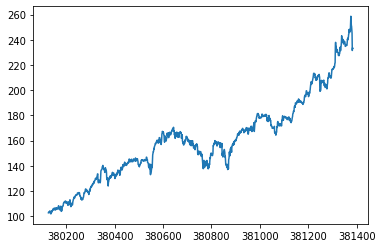

In [90]:
mmm = data[data['Name'] == 'MMM'].copy()
mmm['close'].plot()

In [91]:
# Calculate the returns and log_returns

mmm['prev_close'] = mmm['close'].shift(1)
mmm['return'] = mmm['close'] / mmm['prev_close'] -1
mmm['log_return'] = np.log(mmm['return'] + 1)

In [92]:
# Get mean and std of MMM
# Note how close the results are really close to 0, however, the above plot shows a strong positive trend.

mmm['return'].mean(), mmm['return'].std()

(0.0007001182500580143, 0.009768718404053094)

<AxesSubplot:>

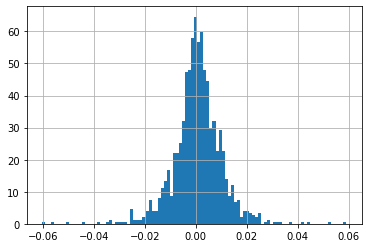

In [93]:
mmm['return'].hist(bins=100, density=True)

In [94]:
# Calculate the 95% confidence interval
m = mmm['return'].mean()
s = mmm['return'].std(ddof=1)
low = m - 1.96 * s / np.sqrt(len(mmm['return']))
high = m + 1.96 * s / np.sqrt(len(mmm['return']))
print(low, high, m, s)

0.0001605072466054154 0.0012397292535106133 0.0007001182500580143 0.009768718404053094


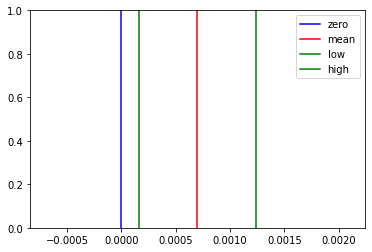

In [96]:
# Plot the confidence interval - and a Zero line

plt.xlim((low - 0.001, high + 0.001))   # X-axis
plt.axvline(0, label='zero', color='blue')
plt.axvline(m, label='mean', color='red')
plt.axvline(low, label='low', color='green')
plt.axvline(high, label='high', color='green')
plt.legend()

In [97]:
# Perform the t-test on both returns and log_returns compared to 0

ttest_1samp(mmm['return'].dropna(), 0)

Ttest_1sampResult(statistic=2.541991701703365, pvalue=0.011141496531324404)

In [98]:
ttest_1samp(mmm['log_return'].dropna(), 0)

Ttest_1sampResult(statistic=2.365963115873947, pvalue=0.018134246809755054)

Since the pvalue for both the returns and log_returns are way above the 95% confidence interval (low/high), we **reject the null hypothesis** that these returns come from a distribution with a true mean 0.

---
